## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\UDACITY\LESSON 3 ASSIGNMENT (AB TESTING)\ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
a=df.query('group == "treatment" and landing_page=="old_page"').count()[0]
b=df.query('group == "control" and landing_page=="new_page"').count()[0]
a
b
a+b

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


No, we don't have any missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
ab=df.query('group == "treatment" and landing_page=="new_page"')
cd=df.query('group == "control" and landing_page=="old_page"')
ab.head(2)


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


In [9]:
cd.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [10]:
frames=[ab,cd]
df2 = pd.concat(frames)

In [11]:
df2.tail(2)

,user_id,timestamp,group,landing_page,converted
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'] ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2=df2.drop_duplicates(subset=['user_id'],keep= "first")

In [17]:
df2[df2['user_id'] ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2['converted'].value_counts()[1]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
q=df2.query('group == "control"')

In [20]:
q['converted'].value_counts()[1]/q.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
qq=df2.query('group == "treatment"')
qq['converted'].value_counts()[1]/q.shape[0]

0.1188375070556328

d. What is the probability that an individual received the new page?

In [22]:
df2['landing_page'].value_counts()[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

The probablity of receiving a new page is almost same as receiving an old page.
With our analysis , it has been observed that 12.04 % of our treatment group's convert whereas 11.88 % of our control  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null hypothesis :    $p_{old}$ > $p_{new}$


Alternative hypothesis :    $p_{old}$ < $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:

crn=df2['converted'].mean()
crn

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:

cro=df2['converted'].mean()
cro

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new=df2.query('group == "treatment"')['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old=df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted=np.random.choice(a=[0,1],size=n_new,replace=True,p=[crn,(1-crn)])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted=np.random.choice(a=[0,1],size=n_old,replace=True,p=[cro,(1-cro)])
old_page_converted

array([0, 1, 1, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
p_old=new_page_converted.mean()
p_new=old_page_converted.mean()
p_old
print(p_old)
print(p_new)
print(p_new-p_old)

0.8811162342577937
0.8799441056211021
-0.0011721286366915828


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

p_diffs = []

size = df2.shape[0]

for _ in range(10000):

    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "treatment"')
    control_cr = control_df.converted.mean()
    experiment_cr = experiment_df.converted.mean()
    p_diffs.append(experiment_cr - control_cr) 



The above stated method is taking too long to execute

In [30]:
new_converted_simulation = np.random.binomial(n_new, crn, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, cro, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [31]:
p_diffs

array([ 0.00242055, -0.00171594, -0.00044275, ...,  0.00103702,
        0.00021123, -0.00071084])

In [32]:
len(p_diffs)

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

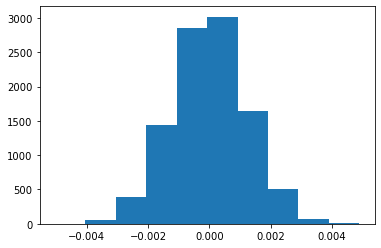

In [33]:
diffs=np.array(p_diffs)
plt.hist(diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
new=df2.query('group == "treatment"')['converted'].mean()
old=df2.query('group == "control"')['converted'].mean()
actual_diff=old-new
actual_diff

0.0015782389853555567

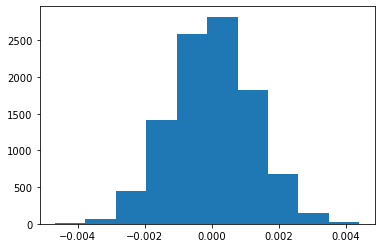

In [35]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);


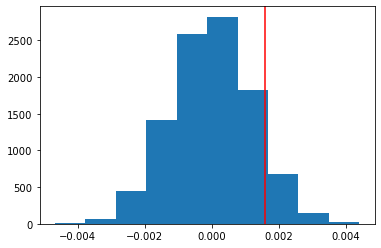

In [36]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(actual_diff, c='red')


In [37]:
# p value
(null_vals < actual_diff).mean()

0.9007

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

In the part j , we have computed p-value .

It has been observed that p-value is greater than 0.05 ,therefore we fail to reject null hypothesis.
i.e  
Null hypothesis :    $p_{old}$ > $p_{new}$

Conversion rate of old page is more as compared to new pages.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('landing_page=="old_page"')['converted'].value_counts()[1]
convert_new = df2.query('landing_page=="new_page"')['converted'].value_counts()[1]
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
n_new = df2.query('landing_page=="new_page"')['user_id'].count()

In [39]:
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [41]:
z_test

1.3109241984234394

In [42]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
p_value > 0.05 , therefore we fail to reject null hypothesis.


Null hypothesis :    $p_{old}$ > $p_{new}$


Yes,they agree with our finding in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

We will be performing Logistic Regression, which is a supervised learning algorithm.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept']=1
df2[['new','old']]=pd.get_dummies(df2['landing_page'])
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2 = df2.drop(['old','control','landing_page','group'] ,axis=1)

In [44]:
df2.tail(2)

,user_id,timestamp,converted,intercept,new,ab_page
294475,734608,2017-01-22 11:45:03.439544,0,1,0,0
294476,697314,2017-01-15 01:20:28.957438,0,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
log_mod = sm.Logit(df2['converted'], df2[['ab_page','intercept', 'new']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


LinAlgError: Singular matrix

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
np.exp(results.params)

NameError: name 'results' is not defined

**1.** The chances of conversion for new page is 0.992534 times that of old page and
the chances of conversion for ab_page is 0.992533 times that of control page,when all other factors are kept constant.

**2.** p values of ab_page and new are high which suggests that they are statistically insignificant 


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Put your answer here.**

p value associated is 1.0 .
It varies from the previous value because in AB testing we were following group approach, whereas here we are following individual approach.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

In order to make our model more effective, it is important to use various other important factors. 

Yes, if we add an irrelevant factor in our regression model, we can have irrelevant dependancies which inturn hinders our model's capability.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - 

In [47]:
df3=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\UDACITY\LESSON 3 ASSIGNMENT (AB TESTING)\countries.csv')
df3.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [49]:
df_final=df2.join(df3.set_index('user_id'), on='user_id')

In [50]:
df_final.head(3)

,user_id,timestamp,converted,intercept,new,ab_page,country
2,661590,2017-01-11 16:55:06.154213,0,1,1,1,US
3,853541,2017-01-08 18:28:03.143765,0,1,1,1,US
6,679687,2017-01-19 03:26:46.940749,1,1,1,1,CA


In [51]:
df_final[['CA','UK','US']]=pd.get_dummies(df_final['country'])

In [52]:
df_final.head(3)

,user_id,timestamp,converted,intercept,new,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,0,1,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,1,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,1,1,1,1,CA,1,0,0


In [53]:
df_final=df_final.drop(['country','US'],axis=1)

In [54]:
df_final.head(2)

,user_id,timestamp,converted,intercept,new,ab_page,CA,UK
2,661590,2017-01-11 16:55:06.154213,0,1,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,0,1,1,1,0,0


In [55]:
log_mod = sm.OLS(df_final['converted'], df_final[['ab_page','intercept', 'new','CA','UK']])
results=log_mod.fit()
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.191
Date:                Sat, 30 May 2020   Prob (F-statistic):              0.312
Time:                        09:09:47   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page     1.295e+08   3.54e+08      0.366      0.714   -5.64e+08    8.23e+08
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
new        -1.295e+08   3.54e+08     -0.366      0.714   -8.23e+08    5.64e+08
CA            -0.0042      0.003     -1.515      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.628   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414300.899
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     1.11e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.2e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

No, countries do not play any role in conversion rate. It is because they have  high p value , which makes them statistically insignificant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
df_final['UK_ab_page'] = df_final['UK']*df_final['ab_page']
df_final['CA_ab_page'] = df_final['CA']*df_final['ab_page']

In [57]:
logit3 = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page', 'UK', 'CA', 'UK_ab_page', 'CA_ab_page']])
results = logit3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-05-30 09:09 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

In [58]:
np.exp(results.params)

intercept     0.137178
ab_page       0.979646
UK            0.994272
CA            0.982625
UK_ab_page    1.031896
CA_ab_page    0.954198
dtype: float64

We observe that UK_ab_page and CA_ab_page do not have any significant role in convertion since have have 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!





## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])